In [3]:
import torch
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn as nn
from torch_optimizer import Lookahead
from config import dataset, data_loader, model as model_config, optimizer as optimizer_config, scheduler as scheduler_config, training

# Import custom modules
from src.models.model import KeywordSpottingModel_with_cls
from src.data.data_loader import load_speech_commands_dataset, TFDatasetAdapter, load_bg_noise_dataset
from utils import set_memory_GB, print_model_size, log_to_file, plot_learning_curves
from src.utils.augmentations import add_time_shift_and_align, add_silence
from train_utils import trainig_loop

# Load datasets
train_ds, val_ds, test_ds, silence_ds , info = load_speech_commands_dataset()
bg_noise_ds = load_bg_noise_dataset()


/usr/local/lib/python3.10/dist-packages/mamba_ssm/ops/selective_scan_interface.py:164: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  def forward(ctx, xz, conv1d_weight, conv1d_bias, x_proj_weight, delta_proj_weight,
/usr/local/lib/python3.10/dist-packages/mamba_ssm/ops/selective_scan_interface.py:240: FutureWarning: `torch.cuda.amp.custom_bwd(args...)` is deprecated. Please use `torch.amp.custom_bwd(args..., device_type='cuda')` instead.
  def backward(ctx, dout):
/usr/local/lib/python3.10/dist-packages/mamba_ssm/ops/triton/layer_norm.py:986: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  def forward(
/usr/local/lib/python3.10/dist-packages/mamba_ssm/ops/triton/layer_norm.py:1045: FutureWarning: `torch.cuda.amp.custom_bwd(args...)` is deprecated. Please use `torch.amp.custom_bwd(args..., device_type=

In [4]:

# Initialize datasets with configurations
pytorch_train_dataset = TFDatasetAdapter(train_ds, bg_noise_ds, **dataset, augmentation=[lambda x: add_time_shift_and_align(x)])
pytorch_val_dataset = TFDatasetAdapter(val_ds, None, **dataset, augmentation=None)


2024-09-26 11:33:10.378430: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-09-26 11:33:12.815175: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [6]:

# Create DataLoaders
train_loader = DataLoader(pytorch_train_dataset, **data_loader, shuffle=True)
val_loader = DataLoader(pytorch_val_dataset, **data_loader, shuffle=False)


In [7]:


# Initialize model
model = KeywordSpottingModel_with_cls(**model_config).to("cuda")

# Loss function
criterion = nn.CrossEntropyLoss().to("cuda")

# Optimizer
base_optimizer = optim.Adam(model.parameters(), lr=optimizer_config['lr'], weight_decay=optimizer_config['weight_decay'])
optimizer = Lookahead(base_optimizer, **optimizer_config['lookahead'])

# Scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, **scheduler_config['reduce_lr_on_plateau'])


100%|██████████████████████████████████████████████████████████████████| 1184/1184 [01:53<00:00, 10.45it/s]

Epoch 1/100, Training Loss: 1.2558663472583569, Training Accuracy: 56.00767005752543%


Validation Loss: 0.6681578818943117, Validation Accuracy: 76.69457196867405%
Learning rate after epoch 1: [0.0011942156978344588]
Best model saved


100%|██████████████████████████████████████████████████████████████████| 1184/1184 [01:44<00:00, 11.37it/s]

Epoch 2/100, Training Loss: 0.7256253247992513, Training Accuracy: 75.42006565049238%


Validation Loss: 0.5423686913885437, Validation Accuracy: 81.42046988927896%
Learning rate after epoch 2: [0.0011942156978344588]
Best model saved


100%|██████████████████████████████████████████████████████████████████| 1184/1184 [01:41<00:00, 11.61it/s]

Epoch 3/100, Training Loss: 0.6115283747014867, Training Accuracy: 79.30059475446066%


Validation Loss: 0.4156479701087191, Validation Accuracy: 85.63327032136105%
Learning rate after epoch 3: [0.0011942156978344588]
Best model saved


100%|██████████████████████████████████████████████████████████████████| 1184/1184 [01:47<00:00, 10.97it/s]

Epoch 4/100, Training Loss: 0.5317701161398578, Training Accuracy: 81.83561376710325%


Validation Loss: 0.38364427145961283, Validation Accuracy: 87.06454226302998%
Learning rate after epoch 4: [0.0011942156978344588]
Best model saved


100%|██████████████████████████████████████████████████████████████████| 1184/1184 [01:46<00:00, 11.10it/s]

Epoch 5/100, Training Loss: 0.48781171377521715, Training Accuracy: 83.30462478468588%


Validation Loss: 0.36208683252334595, Validation Accuracy: 87.60464488252768%
Learning rate after epoch 5: [0.0011942156978344588]
Best model saved


100%|██████████████████████████████████████████████████████████████████| 1184/1184 [01:41<00:00, 11.66it/s]

Epoch 6/100, Training Loss: 0.4509292401631388, Training Accuracy: 84.65988494913712%


Validation Loss: 0.3308493938375186, Validation Accuracy: 89.11693221712126%
Learning rate after epoch 6: [0.0011942156978344588]
Best model saved


100%|██████████████████████████████████████████████████████████████████| 1184/1184 [01:46<00:00, 11.17it/s]

Epoch 7/100, Training Loss: 0.411144305442183, Training Accuracy: 85.86564399232994%


Validation Loss: 0.29794223828019795, Validation Accuracy: 89.5760194436943%
Learning rate after epoch 7: [0.0011942156978344588]
Best model saved


100%|██████████████████████████████████████████████████████████████████| 1184/1184 [01:50<00:00, 10.71it/s]

Epoch 8/100, Training Loss: 0.3910978772910312, Training Accuracy: 86.60014950112127%


Validation Loss: 0.2756781040111205, Validation Accuracy: 90.65622468268971%
Learning rate after epoch 8: [0.0011942156978344588]
Best model saved


100%|██████████████████████████████████████████████████████████████████| 1184/1184 [01:48<00:00, 10.93it/s]

Epoch 9/100, Training Loss: 0.37356687132017435, Training Accuracy: 87.44840586304397%


Validation Loss: 0.26659051422681007, Validation Accuracy: 91.08830677828787%
Learning rate after epoch 9: [0.0011942156978344588]
Best model saved


100%|██████████████████████████████████████████████████████████████████| 1184/1184 [01:49<00:00, 10.80it/s]

Epoch 10/100, Training Loss: 0.3507519695605781, Training Accuracy: 88.13091098183236%


Validation Loss: 0.2674997318015023, Validation Accuracy: 91.00729138536322%
Learning rate after epoch 10: [0.0011942156978344588]


100%|██████████████████████████████████████████████████████████████████| 1184/1184 [01:37<00:00, 12.13it/s]

Epoch 11/100, Training Loss: 0.34101198521140663, Training Accuracy: 88.3681627612207%


Validation Loss: 0.26076199789043075, Validation Accuracy: 90.6832298136646%
Learning rate after epoch 11: [0.0011942156978344588]
Best model saved


100%|██████████████████████████████████████████████████████████████████| 1184/1184 [01:46<00:00, 11.07it/s]

Epoch 12/100, Training Loss: 0.32574196255488974, Training Accuracy: 88.7874159056193%


Validation Loss: 0.23266277980007283, Validation Accuracy: 92.00648123143397%
Learning rate after epoch 12: [0.0011942156978344588]
Best model saved


100%|██████████████████████████████████████████████████████████████████| 1184/1184 [01:50<00:00, 10.76it/s]

Epoch 13/100, Training Loss: 0.3065645936813608, Training Accuracy: 89.50892131690988%


Validation Loss: 0.22193979712893497, Validation Accuracy: 92.68160950580611%
Learning rate after epoch 13: [0.0011942156978344588]
Best model saved


100%|██████████████████████████████████████████████████████████████████| 1184/1184 [01:49<00:00, 10.81it/s]

Epoch 14/100, Training Loss: 0.30210340995737983, Training Accuracy: 89.8826741200559%


Validation Loss: 0.2177431827502234, Validation Accuracy: 92.49257358898191%
Learning rate after epoch 14: [0.0011942156978344588]
Best model saved


100%|██████████████████████████████████████████████████████████████████| 1184/1184 [01:48<00:00, 10.93it/s]

Epoch 15/100, Training Loss: 0.29256389676152755, Training Accuracy: 89.98017485131139%


Validation Loss: 0.2110076691903226, Validation Accuracy: 92.60059411288145%
Learning rate after epoch 15: [0.0011942156978344588]
Best model saved


100%|██████████████████████████████████████████████████████████████████| 1184/1184 [01:57<00:00, 10.11it/s]

Epoch 16/100, Training Loss: 0.2803985785592247, Training Accuracy: 90.52942897071728%


Validation Loss: 0.20076017387185272, Validation Accuracy: 92.89765055360519%
Learning rate after epoch 16: [0.0011942156978344588]
Best model saved


100%|██████████████████████████████████████████████████████████████████| 1184/1184 [01:41<00:00, 11.67it/s]

Epoch 17/100, Training Loss: 0.27408146814952883, Training Accuracy: 90.59117943384575%


Validation Loss: 0.2050931435859912, Validation Accuracy: 93.08668647042938%
Learning rate after epoch 17: [0.0011942156978344588]


100%|██████████████████████████████████████████████████████████████████| 1184/1184 [01:43<00:00, 11.46it/s]

Epoch 18/100, Training Loss: 0.2682235763357902, Training Accuracy: 90.808931066983%


Validation Loss: 0.2124597269234124, Validation Accuracy: 92.57358898190657%
Learning rate after epoch 18: [0.0011942156978344588]


100%|██████████████████████████████████████████████████████████████████| 1184/1184 [01:41<00:00, 11.69it/s]

Epoch 19/100, Training Loss: 0.262185855043385, Training Accuracy: 91.01368260261953%


Validation Loss: 0.19370290719076888, Validation Accuracy: 93.14069673237915%
Learning rate after epoch 19: [0.0011942156978344588]
Best model saved


100%|██████████████████████████████████████████████████████████████████| 1184/1184 [01:42<00:00, 11.59it/s]

Epoch 20/100, Training Loss: 0.2547328534325258, Training Accuracy: 91.29968474763561%


Validation Loss: 0.18959050398267857, Validation Accuracy: 93.7888198757764%
Learning rate after epoch 20: [0.0011942156978344588]
Best model saved


100%|██████████████████████████████████████████████████████████████████| 1184/1184 [01:29<00:00, 13.18it/s]

Epoch 21/100, Training Loss: 0.24759466484357365, Training Accuracy: 91.49793623452176%


Validation Loss: 0.1979285052625814, Validation Accuracy: 93.30272751822847%
Learning rate after epoch 21: [0.0011942156978344588]


100%|██████████████████████████████████████████████████████████████████| 1184/1184 [01:44<00:00, 11.32it/s]

Epoch 22/100, Training Loss: 0.24357062790816575, Training Accuracy: 91.7741883064123%


Validation Loss: 0.17782953210904465, Validation Accuracy: 93.81582500675128%
Learning rate after epoch 22: [0.0011942156978344588]
Best model saved


100%|██████████████████████████████████████████████████████████████████| 1184/1184 [01:47<00:00, 11.06it/s]

Epoch 23/100, Training Loss: 0.24242780896492075, Training Accuracy: 91.65393740453054%


Validation Loss: 0.18357178239295116, Validation Accuracy: 93.38374291115312%
Learning rate after epoch 23: [0.0011942156978344588]


100%|██████████████████████████████████████████████████████████████████| 1184/1184 [01:37<00:00, 12.17it/s]

Epoch 24/100, Training Loss: 0.2362220429491277, Training Accuracy: 91.7741883064123%


Validation Loss: 0.17752157531717752, Validation Accuracy: 93.76181474480151%
Learning rate after epoch 24: [0.0011942156978344588]
Best model saved


100%|██████████████████████████████████████████████████████████████████| 1184/1184 [01:40<00:00, 11.74it/s]

Epoch 25/100, Training Loss: 0.23367576746307817, Training Accuracy: 92.0569404270532%


Validation Loss: 0.17386167388331222, Validation Accuracy: 94.00486092357548%
Learning rate after epoch 25: [0.0011942156978344588]
Best model saved


100%|██████████████████████████████████████████████████████████████████| 1184/1184 [01:36<00:00, 12.28it/s]

Epoch 26/100, Training Loss: 0.23165643906198768, Training Accuracy: 92.0016900126751%


Validation Loss: 0.1815482800911096, Validation Accuracy: 93.62678908992709%
Learning rate after epoch 26: [0.0011942156978344588]


100%|██████████████████████████████████████████████████████████████████| 1184/1184 [01:45<00:00, 11.19it/s]

Epoch 27/100, Training Loss: 0.226472413784044, Training Accuracy: 91.9984399882999%


Validation Loss: 0.18550613637805194, Validation Accuracy: 93.65379422090197%
Learning rate after epoch 27: [0.0011942156978344588]


100%|██████████████████████████████████████████████████████████████████| 1184/1184 [01:49<00:00, 10.83it/s]

Epoch 28/100, Training Loss: 0.22423308865698935, Training Accuracy: 92.18369137768534%


Validation Loss: 0.17460287101176028, Validation Accuracy: 93.86983526870105%
Learning rate after epoch 28: [0.0011942156978344588]


100%|██████████████████████████████████████████████████████████████████| 1184/1184 [01:47<00:00, 11.00it/s]

Epoch 29/100, Training Loss: 0.22205541327963835, Training Accuracy: 92.27794208456564%


Validation Loss: 0.17088636703841337, Validation Accuracy: 94.00486092357548%
Learning rate after epoch 29: [0.0011942156978344588]
Best model saved


100%|██████████████████████████████████████████████████████████████████| 1184/1184 [01:50<00:00, 10.73it/s]

Epoch 30/100, Training Loss: 0.21896473555003665, Training Accuracy: 92.41119308394813%


Validation Loss: 0.17949948895240683, Validation Accuracy: 93.65379422090197%
Learning rate after epoch 30: [0.0011942156978344588]


100%|██████████████████████████████████████████████████████████████████| 1184/1184 [01:47<00:00, 11.03it/s]

Epoch 31/100, Training Loss: 0.21424330106025524, Training Accuracy: 92.71669537521531%


Validation Loss: 0.16121337141424835, Validation Accuracy: 94.46394815014852%
Learning rate after epoch 31: [0.0011942156978344588]
Best model saved


100%|██████████████████████████████████████████████████████████████████| 1184/1184 [01:37<00:00, 12.19it/s]

Epoch 32/100, Training Loss: 0.21103708513239966, Training Accuracy: 92.77519581396861%


Validation Loss: 0.1616711985593388, Validation Accuracy: 94.38293275722387%
Learning rate after epoch 32: [0.0011942156978344588]


100%|██████████████████████████████████████████████████████████████████| 1184/1184 [01:54<00:00, 10.35it/s]

Epoch 33/100, Training Loss: 0.20837753167811693, Training Accuracy: 92.72644544834087%


Validation Loss: 0.15667881404857276, Validation Accuracy: 94.49095328112341%
Learning rate after epoch 33: [0.0011942156978344588]
Best model saved


100%|██████████████████████████████████████████████████████████████████| 1184/1184 [01:44<00:00, 11.33it/s]

Epoch 34/100, Training Loss: 0.20838688534835503, Training Accuracy: 92.87269654522409%


Validation Loss: 0.16764804436271633, Validation Accuracy: 94.1398865784499%
Learning rate after epoch 34: [0.0011942156978344588]


100%|██████████████████████████████████████████████████████████████████| 1184/1184 [01:37<00:00, 12.18it/s]

Epoch 35/100, Training Loss: 0.20523038296645657, Training Accuracy: 92.83044622834672%


Validation Loss: 0.1600125508099612, Validation Accuracy: 94.62597893599784%
Learning rate after epoch 35: [0.0011942156978344588]


100%|██████████████████████████████████████████████████████████████████| 1184/1184 [01:53<00:00, 10.46it/s]

Epoch 36/100, Training Loss: 0.2088025996273319, Training Accuracy: 92.86619649647372%


Validation Loss: 0.15981199858723194, Validation Accuracy: 94.5179584120983%
Learning rate after epoch 36: [0.0011942156978344588]


100%|██████████████████████████████████████████████████████████████████| 1184/1184 [01:48<00:00, 10.93it/s]

Epoch 37/100, Training Loss: 0.19806672838033568, Training Accuracy: 93.20744905586793%


Validation Loss: 0.15740837776623146, Validation Accuracy: 94.8690251147718%
Learning rate after epoch 37: [0.00011942156978344588]


100%|██████████████████████████████████████████████████████████████████| 1184/1184 [01:32<00:00, 12.78it/s]

Epoch 38/100, Training Loss: 0.17636035133673922, Training Accuracy: 93.85745393090448%


Validation Loss: 0.14266148522672067, Validation Accuracy: 95.30110721036996%
Learning rate after epoch 38: [0.00011942156978344588]
Best model saved


100%|██████████████████████████████████████████████████████████████████| 1184/1184 [01:46<00:00, 11.10it/s]

Epoch 39/100, Training Loss: 0.16383868811858152, Training Accuracy: 94.3839578796841%


Validation Loss: 0.14138559132026365, Validation Accuracy: 95.30110721036996%
Learning rate after epoch 39: [0.00011942156978344588]
Best model saved


100%|██████████████████████████████████████████████████████████████████| 1184/1184 [01:47<00:00, 11.04it/s]

Epoch 40/100, Training Loss: 0.15787444555344582, Training Accuracy: 94.48145861093958%


Validation Loss: 0.14208769999522639, Validation Accuracy: 95.11207129354577%
Learning rate after epoch 40: [0.00011942156978344588]


100%|██████████████████████████████████████████████████████████████████| 1184/1184 [01:48<00:00, 10.93it/s]

Epoch 41/100, Training Loss: 0.15611884723487468, Training Accuracy: 94.58220936657025%


Validation Loss: 0.13893032574316266, Validation Accuracy: 95.30110721036996%
Learning rate after epoch 41: [0.00011942156978344588]
Best model saved


100%|██████████████████████████████████████████████████████████████████| 1184/1184 [01:43<00:00, 11.49it/s]

Epoch 42/100, Training Loss: 0.1539260218713615, Training Accuracy: 94.50745880594104%


Validation Loss: 0.14043015184799224, Validation Accuracy: 95.54415338914394%
Learning rate after epoch 42: [0.00011942156978344588]


100%|██████████████████████████████████████████████████████████████████| 1184/1184 [01:47<00:00, 10.98it/s]

Epoch 43/100, Training Loss: 0.1490584049317624, Training Accuracy: 94.75121063407975%


Validation Loss: 0.14039167155710316, Validation Accuracy: 95.32811234134486%
Learning rate after epoch 43: [0.00011942156978344588]


100%|██████████████████████████████████████████████████████████████████| 1184/1184 [01:47<00:00, 11.02it/s]

Epoch 44/100, Training Loss: 0.1541456588067278, Training Accuracy: 94.57895934219506%


Validation Loss: 0.13842500673633043, Validation Accuracy: 95.03105590062111%
Learning rate after epoch 44: [0.00011942156978344588]
Best model saved


100%|██████████████████████████████████████████████████████████████████| 1184/1184 [01:42<00:00, 11.54it/s]

Epoch 45/100, Training Loss: 0.14424126791099962, Training Accuracy: 95.04046280347103%


Validation Loss: 0.13952924981485348, Validation Accuracy: 95.16608155549554%
Learning rate after epoch 45: [0.00011942156978344588]


100%|██████████████████████████████████████████████████████████████████| 1184/1184 [01:50<00:00, 10.76it/s]

Epoch 46/100, Training Loss: 0.14535677197095906, Training Accuracy: 94.89096168221262%


Validation Loss: 0.13810198573994784, Validation Accuracy: 95.03105590062111%
Learning rate after epoch 46: [0.00011942156978344588]
Best model saved


100%|██████████████████████████████████████████████████████████████████| 1184/1184 [02:01<00:00,  9.77it/s]

Epoch 47/100, Training Loss: 0.1453547759386286, Training Accuracy: 94.98196236471773%


Validation Loss: 0.13829281957497677, Validation Accuracy: 95.22009181744531%
Learning rate after epoch 47: [0.00011942156978344588]


100%|██████████████████████████████████████████████████████████████████| 1184/1184 [01:22<00:00, 14.37it/s]

Epoch 48/100, Training Loss: 0.1401378146706643, Training Accuracy: 94.9884624134681%


Validation Loss: 0.14018910767598455, Validation Accuracy: 95.058061031596%
Learning rate after epoch 48: [0.00011942156978344588]


100%|██████████████████████████████████████████████████████████████████| 1184/1184 [01:56<00:00, 10.15it/s]

Epoch 49/100, Training Loss: 0.14201995833974326, Training Accuracy: 95.06321297409731%


Validation Loss: 0.13805006015752735, Validation Accuracy: 95.11207129354577%
Learning rate after epoch 49: [0.00011942156978344588]
Best model saved


100%|██████████████████████████████████████████████████████████████████| 1184/1184 [01:47<00:00, 10.96it/s]

Epoch 50/100, Training Loss: 0.14048076251787575, Training Accuracy: 95.12496343722577%


Validation Loss: 0.13904512097075633, Validation Accuracy: 95.13907642452065%
Learning rate after epoch 50: [0.00011942156978344588]


100%|██████████████████████████████████████████████████████████████████| 1184/1184 [01:55<00:00, 10.28it/s]

Epoch 51/100, Training Loss: 0.1435791778752212, Training Accuracy: 95.03396275472066%


Validation Loss: 0.13779209921514238, Validation Accuracy: 95.08506616257088%
Learning rate after epoch 51: [0.00011942156978344588]
Best model saved


100%|██████████████████████████████████████████████████████████████████| 1184/1184 [01:40<00:00, 11.80it/s]

Epoch 52/100, Training Loss: 0.1391273167899124, Training Accuracy: 95.15421365660242%


Validation Loss: 0.13842001634689008, Validation Accuracy: 95.11207129354577%
Learning rate after epoch 52: [0.00011942156978344588]


100%|██████████████████████████████████████████████████████████████████| 1184/1184 [01:26<00:00, 13.76it/s]

Epoch 53/100, Training Loss: 0.13729938460174534, Training Accuracy: 95.33621502161266%


Validation Loss: 0.13851792496625803, Validation Accuracy: 95.19308668647042%
Learning rate after epoch 53: [0.00011942156978344588]


100%|██████████████████████████████████████████████████████████████████| 1184/1184 [01:47<00:00, 11.01it/s]

Epoch 54/100, Training Loss: 0.14038059147207751, Training Accuracy: 95.07621307159803%


Validation Loss: 0.13799740841133534, Validation Accuracy: 95.22009181744531%
Learning rate after epoch 54: [0.00011942156978344588]


100%|██████████████████████████████████████████████████████████████████| 1184/1184 [01:50<00:00, 10.73it/s]

Epoch 55/100, Training Loss: 0.13619952847098782, Training Accuracy: 95.3102148266112%


Validation Loss: 0.13682978820557204, Validation Accuracy: 95.13907642452065%
Learning rate after epoch 55: [0.00011942156978344588]
Best model saved


100%|██████████████████████████████████████████████████████████████████| 1184/1184 [01:42<00:00, 11.55it/s]

Epoch 56/100, Training Loss: 0.13894924031174505, Training Accuracy: 95.16071370535279%


Validation Loss: 0.13392527160964177, Validation Accuracy: 95.38212260329463%
Learning rate after epoch 56: [0.00011942156978344588]
Best model saved


100%|██████████████████████████████████████████████████████████████████| 1184/1184 [01:49<00:00, 10.77it/s]

Epoch 57/100, Training Loss: 0.13757197726241627, Training Accuracy: 95.1217134128506%


Validation Loss: 0.13638394142475005, Validation Accuracy: 95.13907642452065%
Learning rate after epoch 57: [0.00011942156978344588]


100%|██████████████████████████████████████████████████████████████████| 1184/1184 [01:51<00:00, 10.59it/s]

Epoch 58/100, Training Loss: 0.13233626088184472, Training Accuracy: 95.35571516786376%


Validation Loss: 0.13969854482895713, Validation Accuracy: 95.2470969484202%
Learning rate after epoch 58: [0.00011942156978344588]


100%|██████████████████████████████████████████████████████████████████| 1184/1184 [01:49<00:00, 10.77it/s]

Epoch 59/100, Training Loss: 0.13568677438377416, Training Accuracy: 95.36221521661412%


Validation Loss: 0.1348076258473411, Validation Accuracy: 95.4361328652444%
Learning rate after epoch 59: [0.00011942156978344588]


100%|██████████████████████████████████████████████████████████████████| 1184/1184 [01:45<00:00, 11.18it/s]

Epoch 60/100, Training Loss: 0.1337950484611537, Training Accuracy: 95.3849653872404%


Validation Loss: 0.13904234371351573, Validation Accuracy: 95.13907642452065%
Learning rate after epoch 60: [1.194215697834459e-05]


100%|██████████████████████████████████████████████████████████████████| 1184/1184 [01:46<00:00, 11.12it/s]

Epoch 61/100, Training Loss: 0.13174600668365177, Training Accuracy: 95.4239656797426%


Validation Loss: 0.13735063162703925, Validation Accuracy: 95.22009181744531%
Learning rate after epoch 61: [1.194215697834459e-05]
Early stopping triggered
Stopping training at epoch 61 due to early stopping


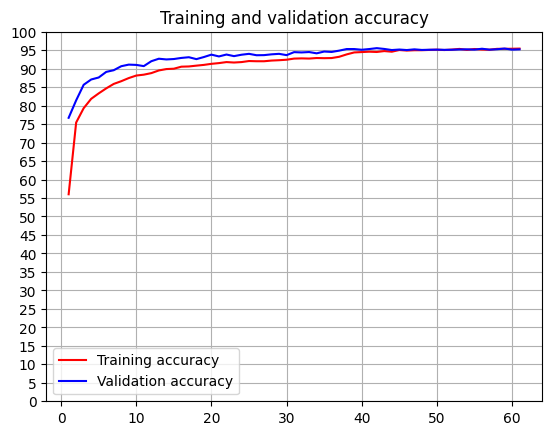

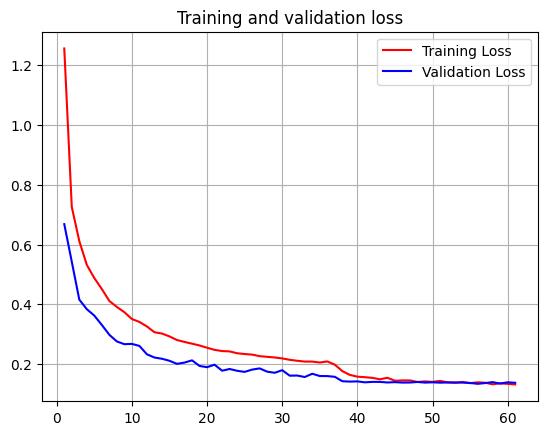

In [8]:

# Training loop
num_epochs = training['num_epochs']
try:
    train_accuracies, val_accuracies, train_losses, val_losses = trainig_loop(model, num_epochs, train_loader, val_loader, criterion, optimizer, scheduler)
    plot_learning_curves(train_accuracies, val_accuracies, train_losses, val_losses, save_to_file=True)
except Exception as err:
    log_to_file(str(err))



In [10]:
# load test data
pytorch_test_dataset = TFDatasetAdapter(test_ds, None, **dataset, augmentation=None)
test_loader = DataLoader(pytorch_test_dataset, **data_loader, shuffle=False)

# Evaluate the model on the test set
accuracy = 0
total = 0
model.eval()

with torch.no_grad():
    for audio, labels in test_loader:
        audio, labels = audio.to("cuda"), labels.to("cuda")
        outputs = model(audio)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        accuracy += (predicted == labels).sum().item()
test_accuracy = 100 * accuracy / total
print(f'Test Accuracy: {test_accuracy}%')



Test Accuracy: 95.72901325478645%


In [11]:
import pandas as pd
from utils import compute_inference_GPU_mem

# Define missing variables
configs = {'batch_size': 32}  # Example value, adjust as needed
input_dim = model_config['input_dim']  # Example value, adjust as needed
d_model = model_config['d_model']  # Example value, adjust as needed
d_state = model_config['d_state']  # Example value, adjust as needed
d_conv = model_config['d_conv']  # Example value, adjust as needed
expand = model_config['expand']  # Example value, adjust as needed

# Save model size(macs, params) and accuracy
batch_size = configs['batch_size']
macs, params = print_model_size(model, input_size=torch.randn(batch_size, input_dim, d_model-1).to("cuda"))
macs = macs / 1e9
accuracy = test_accuracy
data = {'Model': ['KeywordSpottingModel_RSM_Norm_0-1-2_order_cls_bgnoise'], 'GMACs': [macs], 'Params': [params], 'Accuracy': [accuracy]}
model_config = {'input_dim': input_dim, 'd_model': d_model, 'd_state': d_state, 'd_conv': d_conv, 'expand': expand}
data.update(model_config)
inf_GPU_mem = compute_inference_GPU_mem(model, input=torch.randn(1, input_dim, d_model-1).to("cuda"))
# Inference macs and params
inf_macs, inf_params = print_model_size(model, input_size=torch.randn(1, input_dim, d_model-1).to("cuda"))
inference_data = {'Inference CUDA Mem in MB': [inf_GPU_mem], 'Inference GMACs': [inf_macs / 1e9], 'Inference Params': [inf_params]}
data.update(inference_data)
df = pd.DataFrame(data, index=[0])
df.to_csv('results.csv', mode='a', header=False)

[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.Conv1d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.dropout.Dropout'>.

MACs: 650593536.0 Which are 0.650593536 Giga-MACs, Params: 151242.0

[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.Conv1d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.dropout.Dropout'>.

MACs: 20331048.0 Which are 0.020331048 Giga-MACs, Params: 151242.0

